In [6]:
include("MC.jl")

hybrid (generic function with 1 method)

In [11]:
include("viz.jl");

In [3]:
default(fmt=:png, dpi=:120)

In [4]:
ENV["COLUMNS"] = 200
const N = 30;

### EUR cities

In [4]:
cities = ["Nicosia", "Valletta", "Athens", "Madrid", "Thessaloniki", "Rome", "Bucharest",
          "Ljubljana", "Paris", "Kyiv", "Warsaw", "Berlin", "Dublin", "Copenhagen", 
          "Moscow","Riga", "Stockholm", "Helsinki", "Bergen", "Reykjavik", "Älvsbyn"];

CMFs = [0.84, 0.84, 0.78, 0.78, 0.74, 0.78, 0.68,
        0.66, 0.64, 0.64, 0.62, 0.62, 0.64, 0.63, 
        0.58, 0.62, 0.63, 0.57, 0.59, 0.51, 0.59];

df = DataFrame(:city=>cities, :cmf=>CMFs)

df1 = sort!(df, :cmf, rev=true);

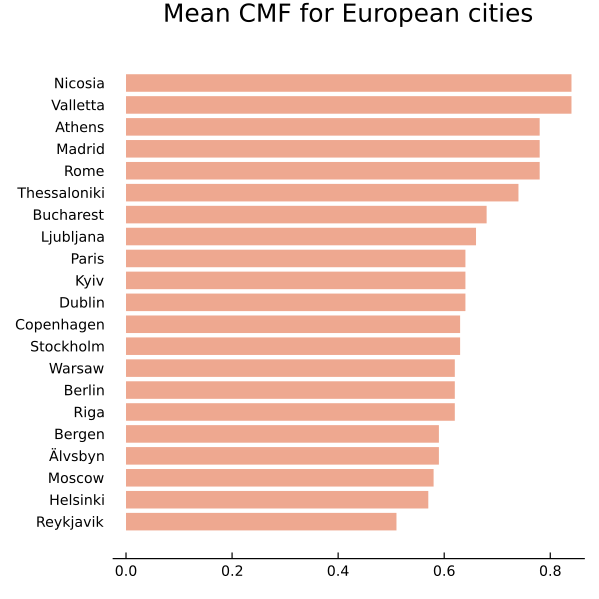

In [5]:
b1 = bar(df1.city, df1.cmf, leg=false, orientation=:horizontal, 
    lw=0, w=0, c=2, alpha=0.6, size=(500, 500), 
    grid=false, yflip=true, yaxis=false, yticks=(0.5:1:21.4, df1.city),
    title="Mean CMF for European cities")

In [5]:
fn_athens = "irradiation_Athens.nc"
fn_bucharest = "irradiation_Bucharest.nc"
fn_berlin = "irradiation_Berlin.nc"
fn_helsinki = "irradiation_Helsinki.nc";

### transition matrix

In [4]:
function get_tranMat(fn)
    data_train, data_test = getCMF(fn; raw=0)
    data_train_cls, binStarts, binMean = getBins(data_train, N) 
    data_test_cls = classify(data_test, binStarts)
    
    df21 = getDF(2, 1, N, data_train_cls, data_test, data_test_cls, binStarts, binMean)
    s_t_2 = df21.pers_cls
    s_t_1 = df21.real_cls
    pred = df21.pred;

    T, T_ct = zeros(N, N), zeros(N, N)
    len = length(pred)
    for i in 1:len-1
        T[s_t_2[i], s_t_1[i]] += pred[i+1]
        T_ct[s_t_2[i], s_t_1[i]] += 1
    end
    T_test = T ./ T_ct
    return binMean, T_test
end

get_tranMat (generic function with 1 method)

In [5]:
binMean_at, T_at = get_tranMat(fn_athens)

([0.19201971761868297, 0.26120676192501346, 0.3170561083443486, 0.37345917459775946, 0.4339303066233101, 0.5037977204413084, 0.5857750666761027, 0.6603870717021594, 0.7146948046941743, 0.7633274446536069  …  0.9521320722877832, 0.9535568936969921, 0.9552510706827709, 0.9571121958740532, 0.9593424773059507, 0.9622716138982916, 0.9670106373366416, 0.974728543502648, 0.9891116135703609, 1.0], [0.226632981719192 0.3621800569804525 … NaN NaN; 0.2414612298740387 0.3107512195810851 … NaN NaN; … ; 0.19201971761868297 0.27237663120888045 … 0.9826468463519155 NaN; NaN NaN … NaN NaN])

In [6]:
binMean_bu, T_bu = get_tranMat(fn_bucharest)

binMean_be, T_be = get_tranMat(fn_berlin)

binMean_he, T_he = get_tranMat(fn_helsinki);

In [8]:
ticks_at = rd.(binMean_at, 2)
xti_at = (binMean_at[[1:2:15; 25; 30]], ticks_at[[1:2:15; 25; 30]])

ticks_bu = rd.(binMean_bu, 2)
xti_bu = (binMean_bu[[1:2:24; 30]], ticks_bu[[1:2:24; 30]])

ticks_be = rd.(binMean_be, 2)
xti_be = (binMean_be[[1:2:26; 30]], ticks_be[[1:2:26; 30]])

ticks_he = rd.(binMean_he, 2)
xti_he = (binMean_he[[1:2:28; 30]], ticks_he[[1:2:28; 30]])

([0.052802522164755526, 0.18607846930125493, 0.28272625089643466, 0.3584197800405555, 0.4271584995811181, 0.5008453342429054, 0.5768235993480554, 0.6443496293246972, 0.7111089850532942, 0.7733712595164653, 0.8218776216886204, 0.8619668134995326, 0.9047806162886182, 0.9419830231459244, 0.9835951367237871], [0.05, 0.19, 0.28, 0.36, 0.43, 0.5, 0.58, 0.64, 0.71, 0.77, 0.82, 0.86, 0.9, 0.94, 0.98])

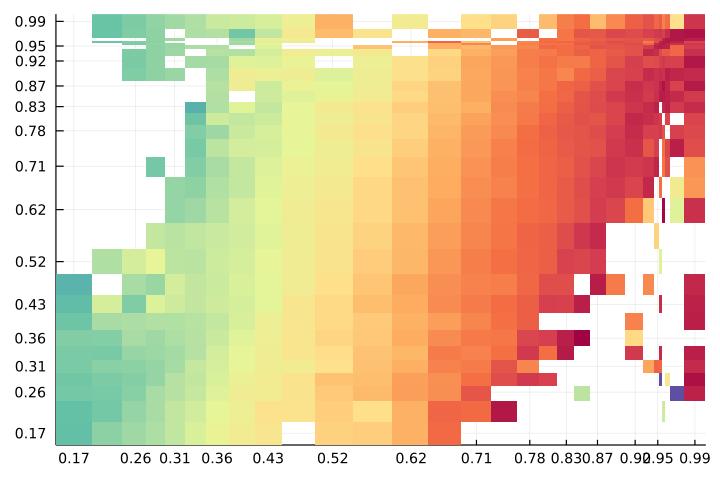

In [9]:
hm_at = heatmap(binMean_at, binMean_at, T_at, c=cgrad(:Spectral_10, rev=true), clim=(0,1), leg=:none,
    xticks=xti_at, yticks=xti_at)

hm_bu = heatmap(binMean_bu, binMean_bu, T_bu, c=cgrad(:Spectral_10, rev=true), clim=(0,1),  leg=:none,
    xticks=xti_bu, yticks=xti_bu)

hm_be = heatmap(binMean_be, binMean_be, T_be, c=cgrad(:Spectral_10, rev=true), clim=(0,1),  leg=:none,
    xticks=xti_be, yticks=xti_be);

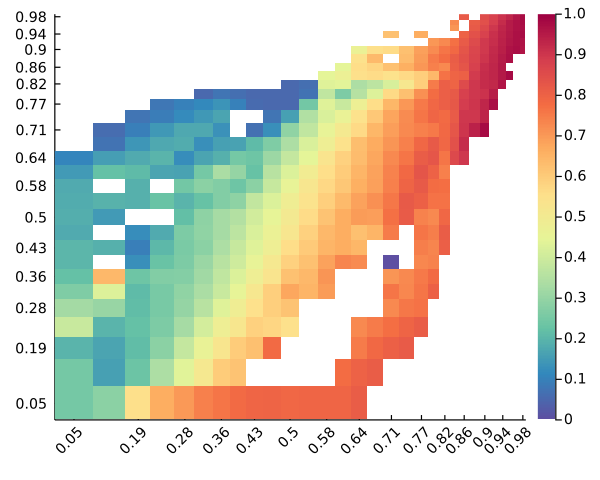

In [155]:
hm_he = heatmap(binMean_he, binMean_he, T_he, c=cgrad(:Spectral_10, rev=true), clim=(0,1), grid=false, xrotation=45, size=(500,400), #leg=:none,
    xticks=xti_he, yticks=xti_he)

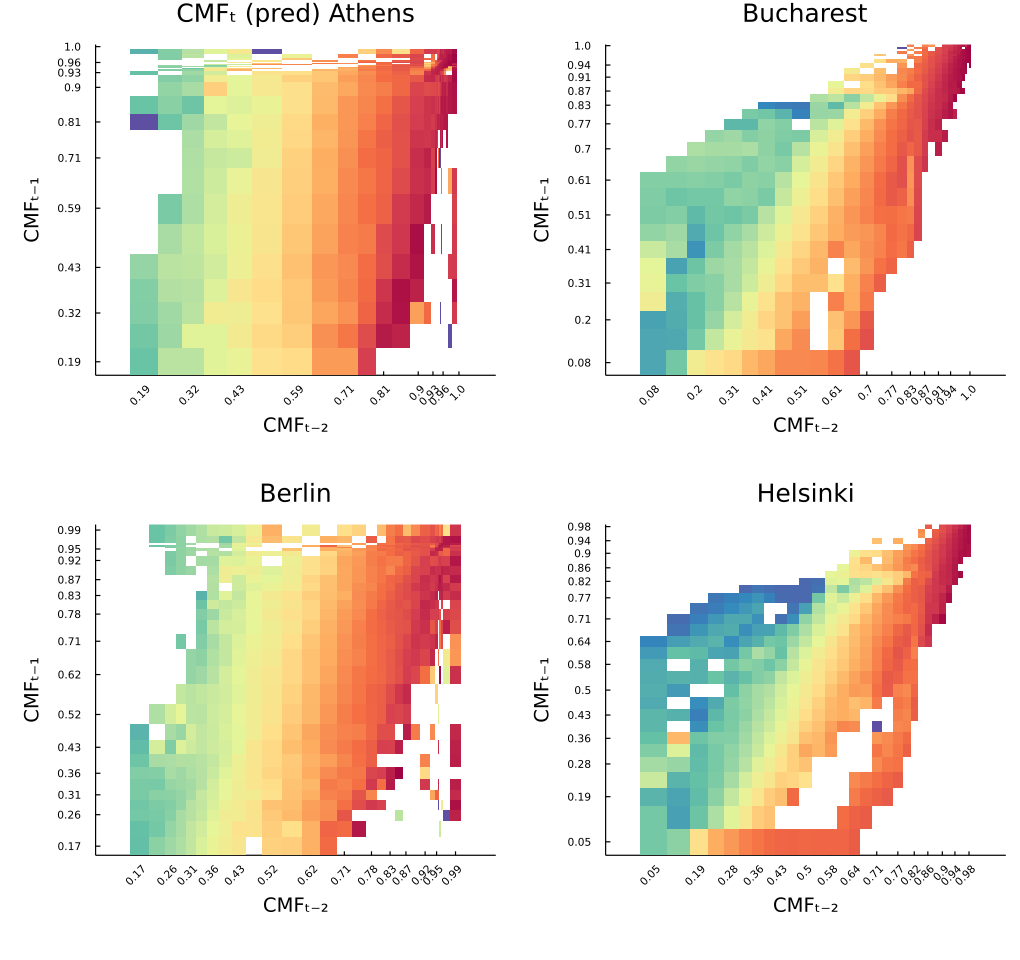

In [154]:
p = plot(hm_at, hm_bu, hm_be, hm_he, layout=@layout([a b; c d]), grid=false, size=(850, 800), 
        title=["CMFₜ (pred) Athens" "Bucharest" "Berlin" "Helsinki"], xrotation=45, aspect_ratio=1,
        xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁", leftmargin=20px, bottommargin=20px, tickfontsize=6)

In [13]:
df22 = getDF(2, 2, N)

,real,real_cls,pers,pers_cls,dif_pers,dif_cls_pers,pred,pred_cls,dif_pred,dif_cls_pred,pred_n,pred_cls_n,dif_pred_n,dif_cls_pred_n
,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64
1,0.841421,12,0.389299,4,-0.452122,-8,0.49599,6,-0.34543,-6,0.564615,7,-0.276806,-5
2,0.77269,10,0.725234,9,-0.0474562,-1,0.735315,9,-0.0373752,-1,0.717158,9,-0.0555324,-1
3,0.303627,3,0.841421,12,0.537794,9,0.842306,12,0.53868,9,0.833206,12,0.529579,9
4,0.191245,1,0.77269,10,0.581445,9,0.737132,9,0.545887,8,0.709775,9,0.51853,8
5,0.306435,3,0.303627,3,-0.00280823,0,0.334387,3,0.0279517,0,0.360152,4,0.0537173,1
6,0.288095,2,0.191245,1,-0.0968499,-1,0.267708,2,-0.020387,0,0.36218,4,0.0740851,2
7,0.256549,2,0.306435,3,0.049886,1,0.361413,4,0.104864,2,0.495484,6,0.238935,4
8,0.229625,1,0.288095,2,0.0584704,1,0.316244,3,0.0866196,2,0.433991,5,0.204366,4
9,0.22068,1,0.256549,2,0.0358689,1,0.310751,3,0.0900711,2,0.433991,5,0.213311,4


### performance stats

In [7]:
function get_df_city(fn, steps; hyb=0) 
    data_train, data_test = getCMF(fn; raw=0)
    data_train_cls, binStarts, binMean = getBins(data_train, N) 
    data_test_cls = classify(data_test, binStarts)    
    df = getDF(2, steps, N, data_train_cls, data_test, data_test_cls, binStarts, binMean)
    if hyb == 1
        return hybrid(df, steps)
    else
        return df
    end
end

get_df_city (generic function with 1 method)

In [63]:
df21_at = get_df_city(fn_athens, 1; hyb=1)

,real,real_cls,pers,pers_cls,dif_pers,dif_cls_pers,pred,pred_cls,dif_pred,dif_cls_pred,mae_min,hyb_m,rmse_min,hyb_r,dif_hyb_m,dif_hyb_r
,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Int64,Float64,Int64,Float64,Float64,Float64
1,0.841421,12,0.725234,9,-0.116186,-3,0.735315,9,-0.106105,-3,2,0.735315,2,0.735315,-0.106105,-0.106105
2,0.303627,3,0.77269,10,0.469064,7,0.737132,9,0.433505,6,1,0.77269,1,0.77269,0.469064,0.469064
3,0.306435,3,0.191245,1,-0.11519,-2,0.267708,2,-0.038727,-1,1,0.191245,1,0.191245,-0.11519,-0.11519
4,0.256549,2,0.288095,2,0.031546,0,0.316244,3,0.0596952,1,1,0.288095,2,0.316244,0.031546,0.0596952
5,0.22068,1,0.229625,1,0.00894446,0,0.241461,2,0.0207811,1,1,0.229625,1,0.229625,0.00894446,0.00894446
6,0.217646,1,0.18659,1,-0.0310559,0,0.226633,1,0.00898698,0,1,0.18659,1,0.18659,-0.0310559,-0.0310559
7,0.215674,1,0.25662,2,0.0409451,1,0.36218,4,0.146506,3,1,0.25662,1,0.25662,0.0409451,0.0409451
8,0.292217,3,0.259827,2,-0.03239,-1,0.36218,4,0.0699626,1,1,0.259827,1,0.259827,-0.03239,-0.03239
9,0.306803,3,0.341479,3,0.0346769,0,0.360152,4,0.0533498,1,1,0.341479,1,0.341479,0.0346769,0.0346769


In [42]:
df22_at = get_df_city(fn_athens, 2; hyb=1)

,real,real_cls,pers,pers_cls,dif_pers,dif_cls_pers,pred,pred_cls,dif_pred,dif_cls_pred,pred_n,pred_cls_n,dif_pred_n,dif_cls_pred_n,mae_min,hyb_m,rmse_min,hyb_r
,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Int64,Float64,Int64,Float64
1,0.77269,10,0.725234,9,-0.0474562,-1,0.735315,9,-0.0373752,-1,0.717158,9,-0.0555324,-1,3,0.717158,3,0.717158
2,0.191245,1,0.77269,10,0.581445,9,0.737132,9,0.545887,8,0.709775,9,0.51853,8,1,0.77269,1,0.77269
3,0.288095,2,0.191245,1,-0.0968499,-1,0.267708,2,-0.020387,0,0.36218,4,0.0740851,2,1,0.191245,2,0.267708
4,0.229625,1,0.288095,2,0.0584704,1,0.316244,3,0.0866196,2,0.433991,5,0.204366,4,1,0.288095,1,0.288095
5,0.18659,1,0.229625,1,0.0430345,0,0.241461,2,0.0548712,1,0.36218,4,0.17559,3,1,0.229625,1,0.229625
6,0.25662,2,0.18659,1,-0.0700295,-1,0.226633,1,-0.0299866,-1,0.226633,1,-0.0299866,-1,1,0.18659,2,0.226633
7,0.259827,2,0.25662,2,-0.00320779,0,0.36218,4,0.102353,2,0.433627,5,0.1738,3,1,0.25662,2,0.36218
8,0.341479,3,0.259827,2,-0.081652,-1,0.36218,4,0.0207007,1,0.433627,5,0.092148,2,1,0.259827,2,0.36218
9,0.232704,2,0.341479,3,0.108775,1,0.360152,4,0.127448,2,0.495484,6,0.26278,4,1,0.341479,2,0.360152


#### test Athens

In [10]:
df21_at = get_df_city(fn_athens, 1)
df1 = df21_at[:,[1, 3, 7]]

In [67]:
df22_at = get_df_city(fn_athens, 2)

In [69]:
df2 = df22_at[:,[1, 3, 7, 11, 16, 18]]

,real,pers,pred,pred_n,hyb_m,hyb_r
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.77269,0.725234,0.735315,0.717158,0.717158,0.717158
2,0.191245,0.77269,0.737132,0.709775,0.77269,0.77269
3,0.288095,0.191245,0.267708,0.36218,0.191245,0.267708
4,0.229625,0.288095,0.316244,0.433991,0.288095,0.288095
5,0.18659,0.229625,0.241461,0.36218,0.229625,0.229625
6,0.25662,0.18659,0.226633,0.226633,0.18659,0.226633
7,0.259827,0.25662,0.36218,0.433627,0.25662,0.36218
8,0.341479,0.259827,0.36218,0.433627,0.259827,0.36218
9,0.232704,0.341479,0.360152,0.495484,0.341479,0.360152


In [52]:
df3 = df22_at[:, [5, 9, 13, 19, 20]]

,dif_pers,dif_pred,dif_pred_n,dif_hyb_m,dif_hyb_r
,Float64,Float64,Float64,Float64,Float64
1,-0.0474562,-0.0373752,-0.0555324,-0.0555324,-0.0555324
2,0.581445,0.545887,0.51853,0.581445,0.581445
3,-0.0968499,-0.020387,0.0740851,-0.0968499,-0.020387
4,0.0584704,0.0866196,0.204366,0.0584704,0.0584704
5,0.0430345,0.0548712,0.17559,0.0430345,0.0430345
6,-0.0700295,-0.0299866,-0.0299866,-0.0700295,-0.0299866
7,-0.00320779,0.102353,0.1738,-0.00320779,0.102353
8,-0.081652,0.0207007,0.092148,-0.081652,0.0207007
9,0.108775,0.127448,0.26278,0.108775,0.127448


In [10]:
df23_at = get_df_city(fn_athens, 3)
df3 = df23_at[:,[1, 3, 7, 11]]

df24_at = get_df_city(fn_athens, 4)
df4 = df24_at[:,[1, 3, 7, 11]];

#### mn ± sd

In [14]:
function viz_mn_sd_city(fn, steps)
    df = get_df_city(fn, steps; hyb=1)
    df2 = df[:, [1, 3, 7, 11, 16, 18]]
    city = split(fn, ['_', '.'])[2]    
    
    df_mn_sd = DataFrame(permutedims(map(mean, eachcol(df2))), names(df2))
    push!(df_mn_sd, map(std, eachcol(df2)))
#     @show df_mn_sd;
    s = scatter(Vector(df_mn_sd[1,:]), leg=:none, marker=(12, 0.5), markercolor=[3, 4, 1, 7, 5, 6],
        xticks=(1:size(df2, 2), names(df2)),
        xlim=(0.4, 6.5), ylim=(0.2, 1.2), yerror=Vector(df_mn_sd[2,:]),
        ylabel="CMF", title=city)
    for i in 1:size(df2, 2)
        mn, sd = rd.(Array(df_mn_sd[1:2, i]), 3)
       annotate!(i, mn-sd-0.1, text("$(mn)±$(sd)", 6))
    end
    return s
end

viz_mn_sd_city (generic function with 1 method)

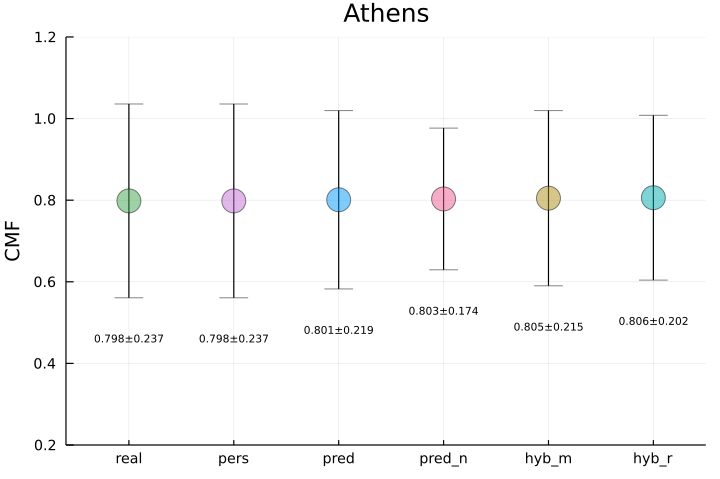

In [15]:
s_at = viz_mn_sd_city(fn_athens, 4)

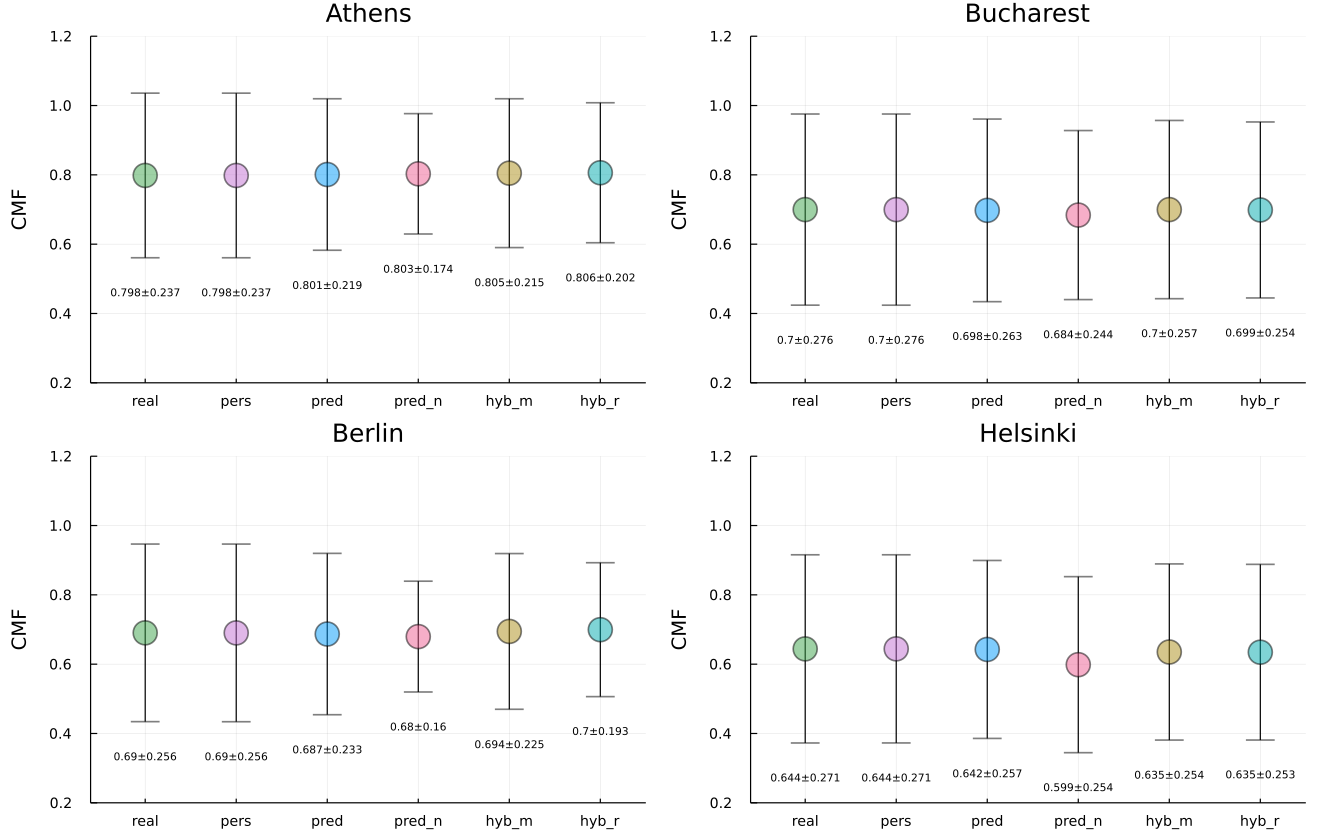

In [16]:
s_bu = viz_mn_sd_city(fn_bucharest, 4)
s_be = viz_mn_sd_city(fn_berlin, 4)
s_he = viz_mn_sd_city(fn_helsinki, 4)

sca = plot(s_at, s_bu, s_be, s_he, layout=@layout([a b; c d]), size=(1100, 700), leftmargin=20px)

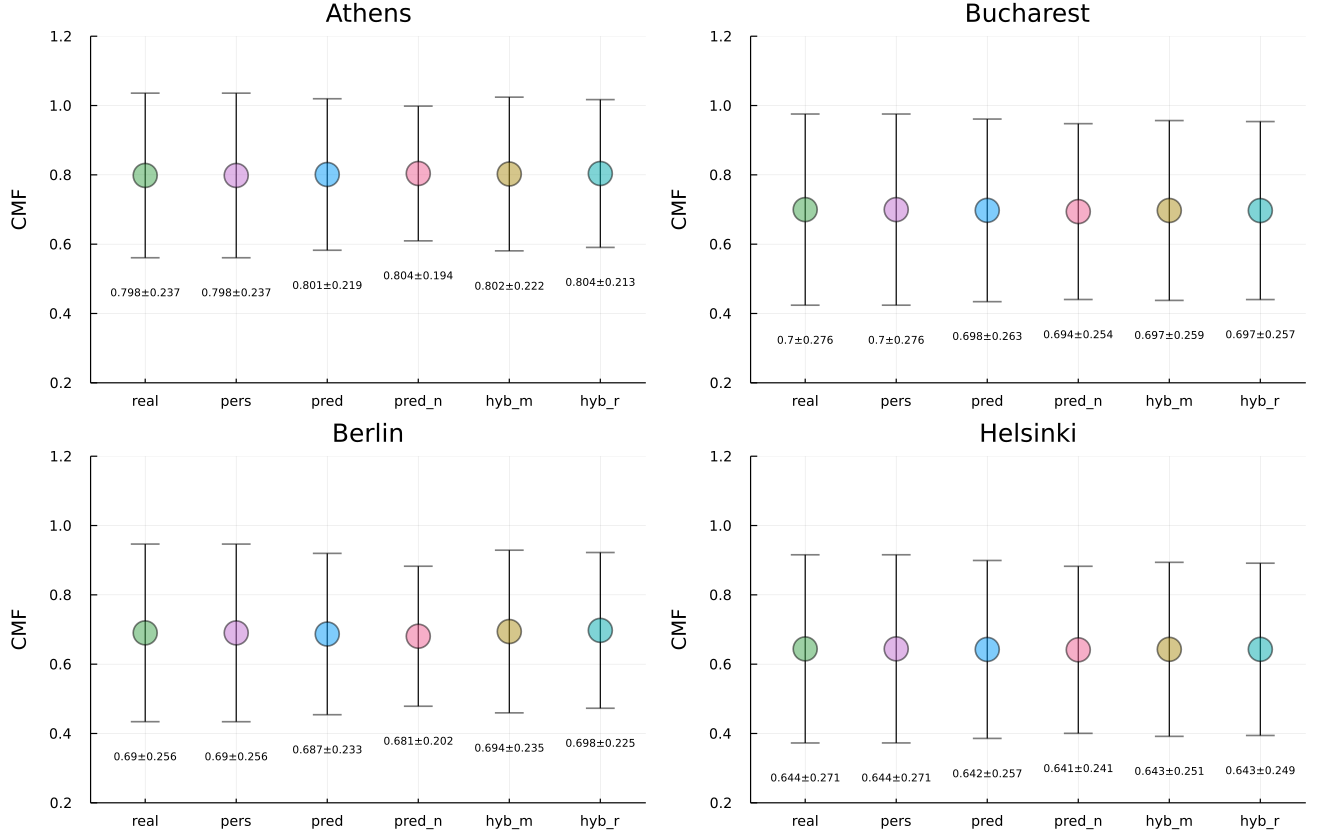

In [51]:
s_at = viz_mn_sd_city(fn_athens)
s_bu = viz_mn_sd_city(fn_bucharest)
s_be = viz_mn_sd_city(fn_berlin)
s_he = viz_mn_sd_city(fn_helsinki)

sca = plot(s_at, s_bu, s_be, s_he, layout=@layout([a b; c d]), size=(1100, 700), leftmargin=20px)

#### bias range

In [20]:
function viz_bias_range_city(fn, steps)
    df = get_df_city(fn, steps; hyb=1)
    df2 = df[:, [5, 9, 13, 19, 20]]
    lab = [n[5:end] for n in names(df2)]
    city = split(fn, ['_', '.'])[2]  
    b = boxplot(Array(df2), leg=:none, frame=:zerolines, outliers=false, 
        c=[4 1 7 5 6], label=lab, xticks=(1:size(df2, 2), lab),
        fillalpha=0.5, lw=0.3, 
        ylabel="CMF bias", title=city)
    return b
end

viz_bias_range_city (generic function with 1 method)

In [22]:
bx_at = viz_bias_range_city(fn_athens, 4)

bx_bu = viz_bias_range_city(fn_bucharest, 4)
bx_be = viz_bias_range_city(fn_berlin, 4)
bx_he = viz_bias_range_city(fn_helsinki, 4)

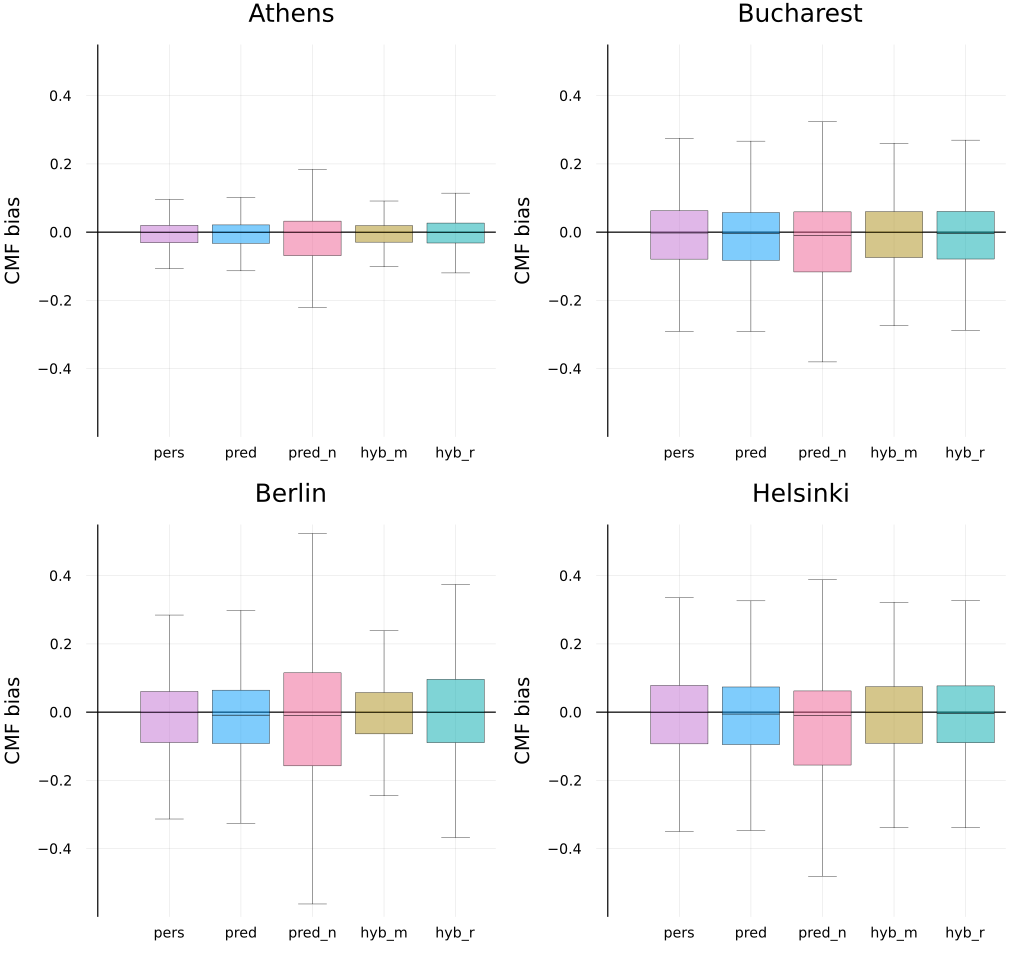

In [24]:
bxs = plot(bx_at, bx_bu, bx_be, bx_he, layout=@layout([a b; c d]), ylim=(-0.6,0.55), size=(850,800))

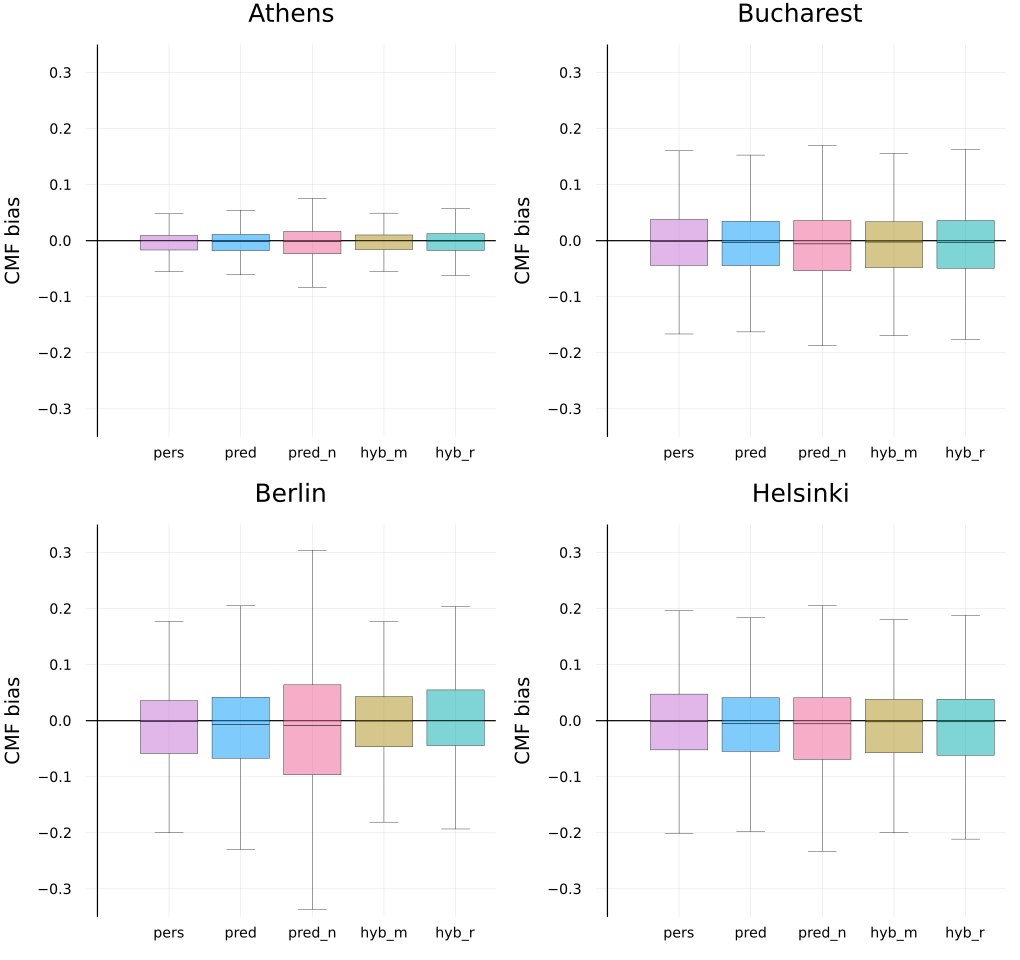

In [62]:
bx_bu = viz_bias_range_city(fn_bucharest)
bx_be = viz_bias_range_city(fn_berlin)
bx_he = viz_bias_range_city(fn_helsinki)

bxs = plot(bx_at, bx_bu, bx_be, bx_he, layout=@layout([a b; c d]), size=(850,800))

#### MAE vs RMSE

In [31]:
function viz_err_city(fn)
    city = split(fn, ['_', '.'])[2] 
    df21 = get_df_city(fn, 1; hyb=1)
    df1 = df21[:,[1, 3, 7, 12, 14]]

    df22 = get_df_city(fn, 2; hyb=1)
    df2 = df22[:,[1, 3, 7, 11, 16, 18]]

    df23 = get_df_city(fn, 3; hyb=1)
    df3 = df23[:,[1, 3, 7, 11, 16, 18]]

    df24 = get_df_city(fn, 4; hyb=1)
    df4 = df24[:,[1, 3, 7, 11, 16, 18]]

    len = size(df2, 2)
    lab = names(df2)[2:end]

    df_err = DataFrame(:method => lab)
    mae1 = [meanad(df1[:,1], df1[:,i]) for i in 2:5]
    insert!(mae1, 3, NaN)
    df_err.mae1 = mae1
    df_err.mae2 = [meanad(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.mae3 = [meanad(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.mae4 = [meanad(df4[:,1], df4[:,i]) for i in 2:len]   

    rmse1 = [rmsd(df1[:,1], df1[:,i]) for i in 2:5]
    insert!(rmse1, 3, NaN)
    df_err.rmse1 = rmse1
    df_err.rmse2 = [rmsd(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.rmse3 = [rmsd(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.rmse4 = [rmsd(df4[:,1], df4[:,i]) for i in 2:len] 
    @show df_err;
    p = plot(leg=:bottomright, xlim=(0,0.2), #ylim=(0,0.25), 
        xlabel="MAE", ylabel="RMSE", title=city)
    clrs = [4, 1, 7, 5, 6]
    for i in 1:5
        plot!(Array(df_err[i,2:5]), Array(df_err[i,6:end]), marker=(0.7, stroke(0)), c=clrs[i], label=lab[i])
    end
    return p
end

viz_err_city (generic function with 1 method)

df_err = 5×9 DataFrame
 Row │ method  mae1         mae2       mae3       mae4       rmse1       rmse2     rmse3     rmse4
     │ String  Float64      Float64    Float64    Float64    Float64     Float64   Float64   Float64
─────┼────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ pers      0.0486766  0.0754606  0.092747   0.10159      0.114414  0.156663  0.179285  0.189782
   2 │ pred      0.0517565  0.0750243  0.09087    0.0985733    0.111045  0.150206  0.171365  0.181273
   3 │ pred_n  NaN          0.0834391  0.104478   0.117954   NaN         0.150591  0.172433  0.186205
   4 │ hyb_m     0.0460999  0.0687094  0.0834153  0.0902198    0.108435  0.144832  0.165403  0.174021
   5 │ hyb_r     0.0472823  0.0709428  0.0865833  0.0951897    0.107365  0.14394   0.162072  0.173894


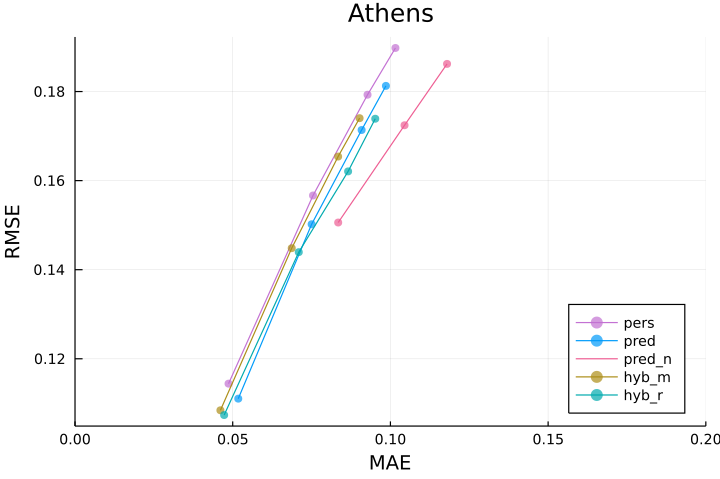

In [32]:
p_at = viz_err_city(fn_athens)

In [29]:
p_bu = viz_err_city(fn_bucharest)

p_be = viz_err_city(fn_berlin)

p_he = viz_err_city(fn_helsinki)

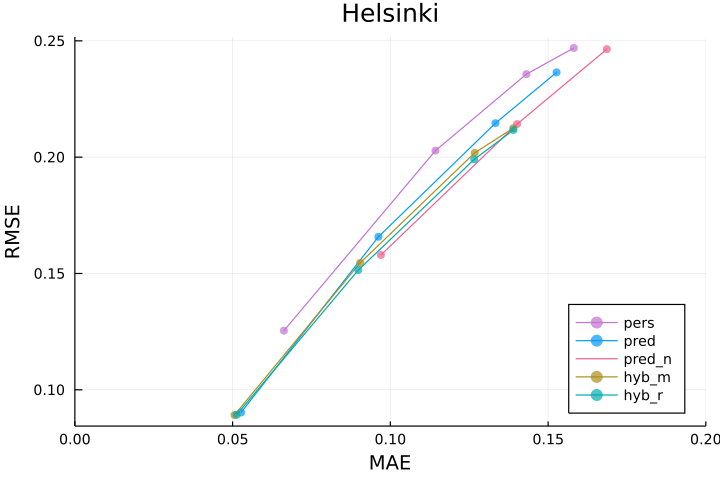

In [13]:
p_he1 = viz_err_city(fn_helsinki)

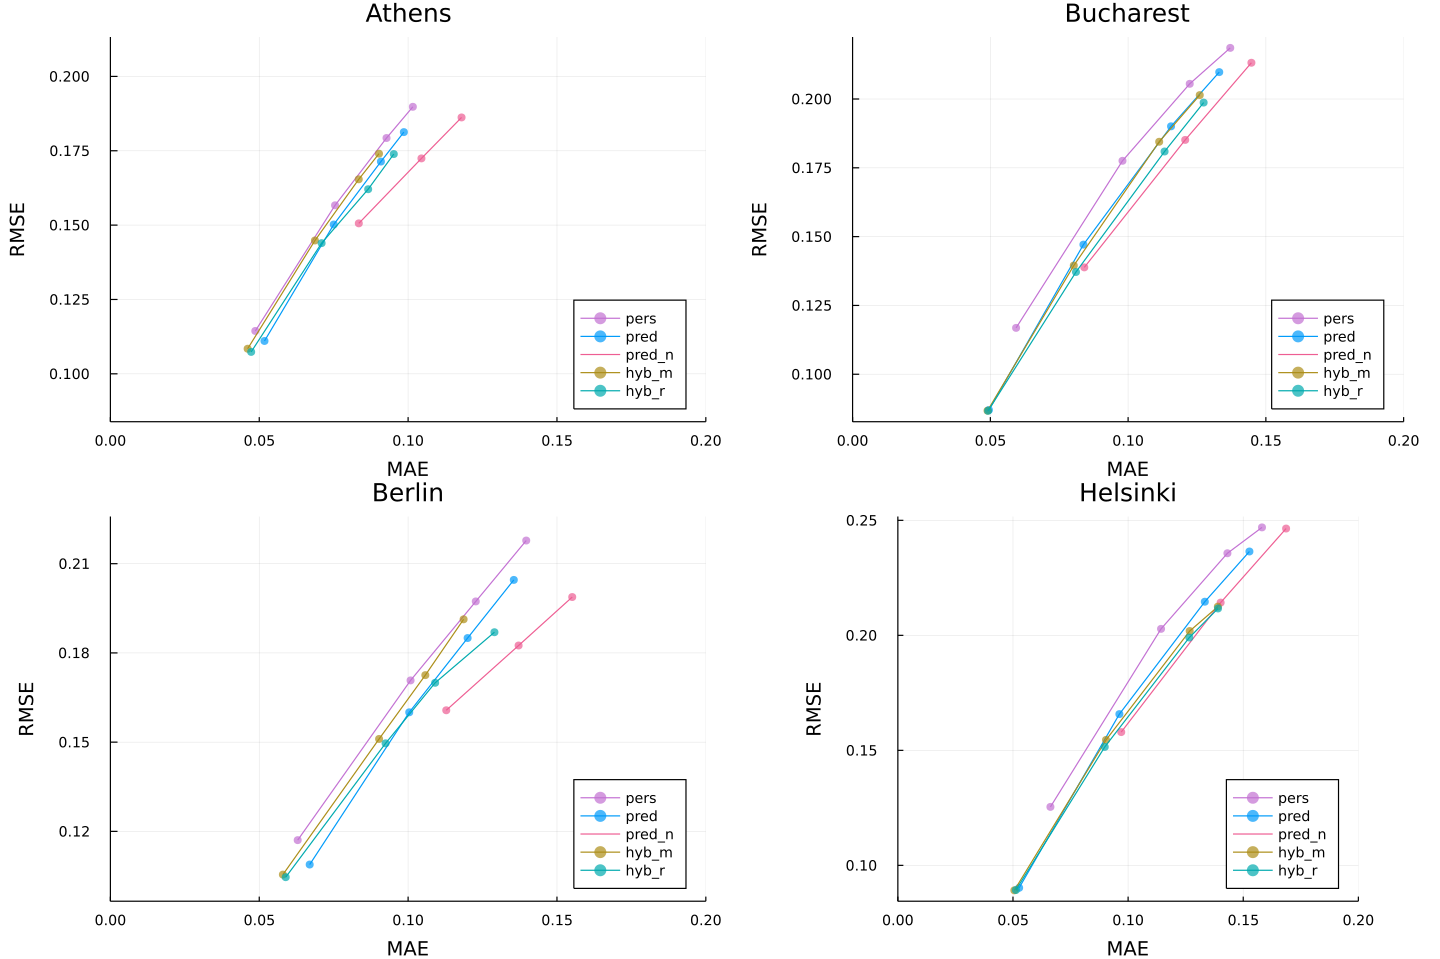

In [30]:
ps = plot(p_at, p_bu, p_be, p_he, layout=@layout([a b; c d]), aspect_ratio=1, leftmargin=20px, size=(1200,800))

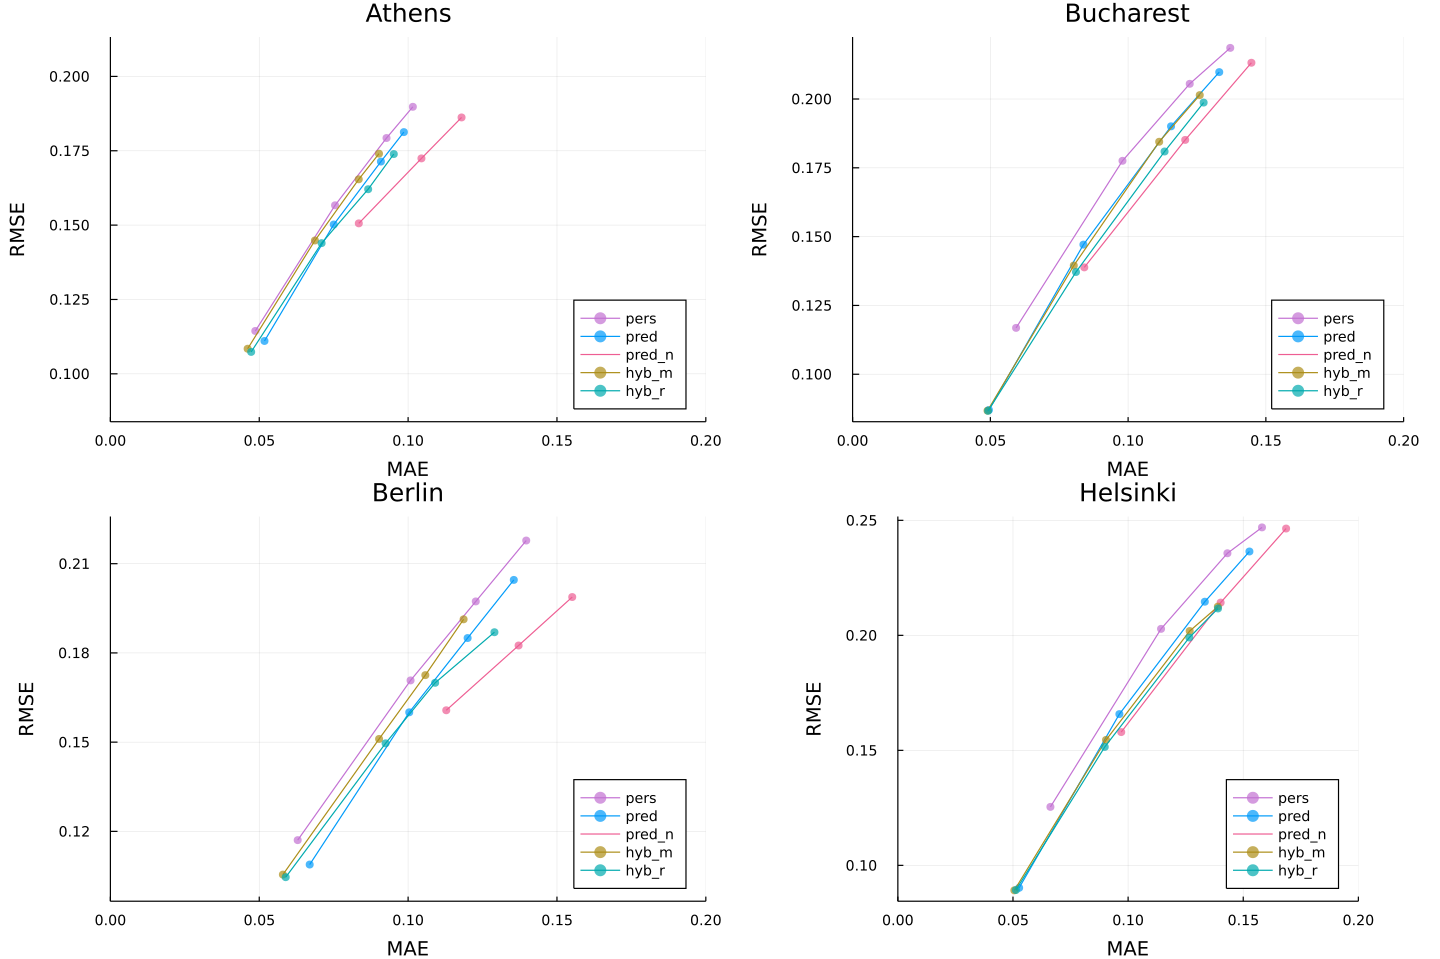

In [131]:
ps = plot(p_at, p_bu, p_be, p_he, layout=@layout([a b; c d]), aspect_ratio=1, leftmargin=20px, size=(1200,800))

#### dif vs bias

In [149]:
function viz_dif_city(fn)
    df22 = get_df_city(fn, 2)
    city = split(fn, ['_', '.'])[2]    
    d = dif_viz(df22, 2; city=city)
    return d
end

viz_dif_city (generic function with 1 method)

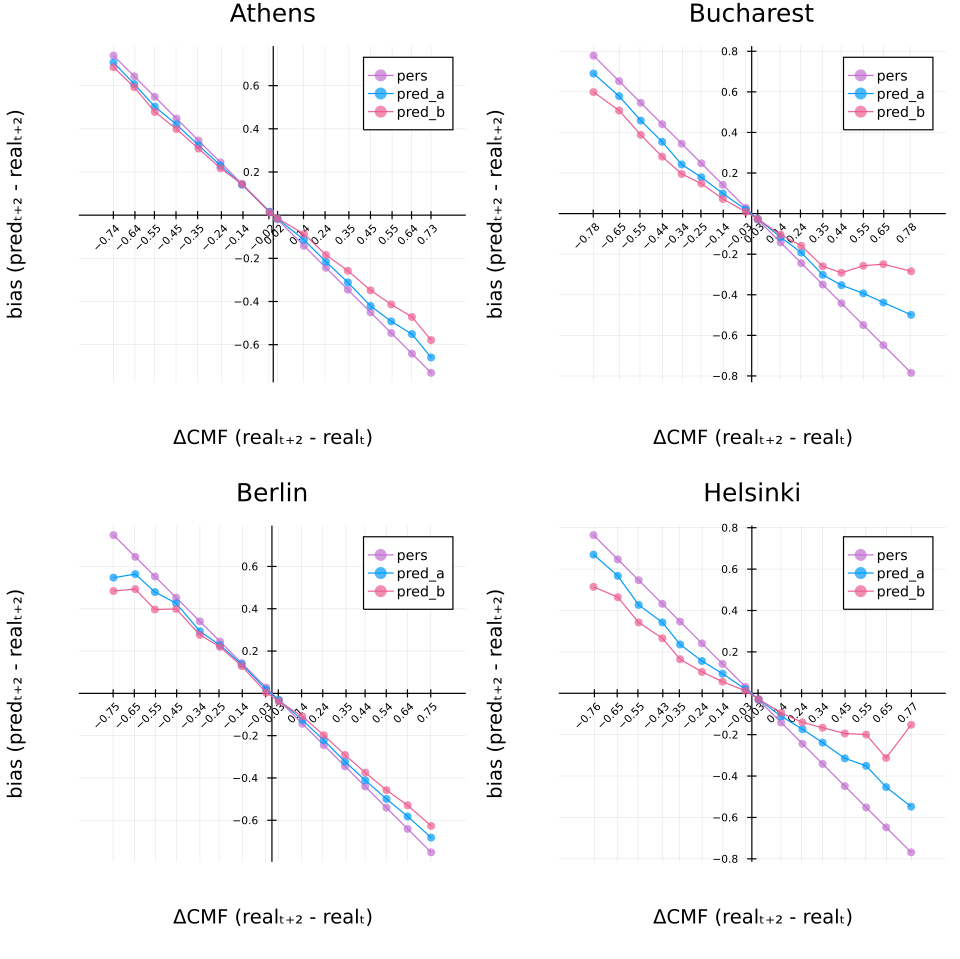

In [152]:
d_at = viz_dif_city(fn_athens)
d_bu = viz_dif_city(fn_bucharest)
d_be = viz_dif_city(fn_berlin)
d_he = viz_dif_city(fn_helsinki)

difs = plot(d_at, d_bu, d_be, d_he, layout=@layout([a b; c d]), size=(800,800))

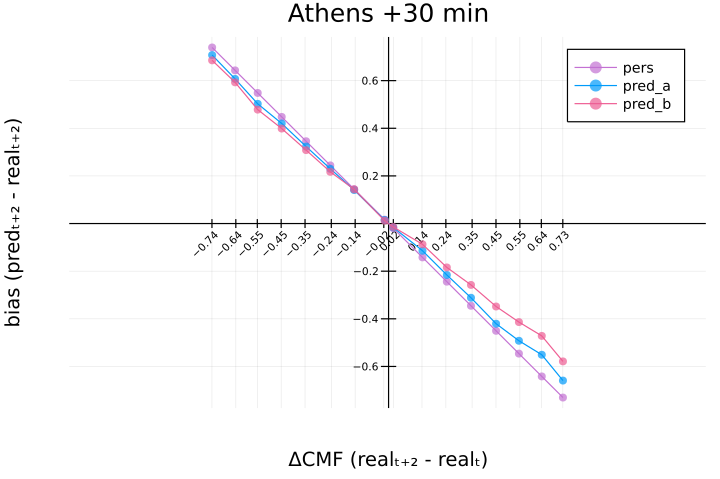

In [87]:
d1 = dif_viz(df22_at, 2; city="Athens")

### +60 min

#### mn ± sd

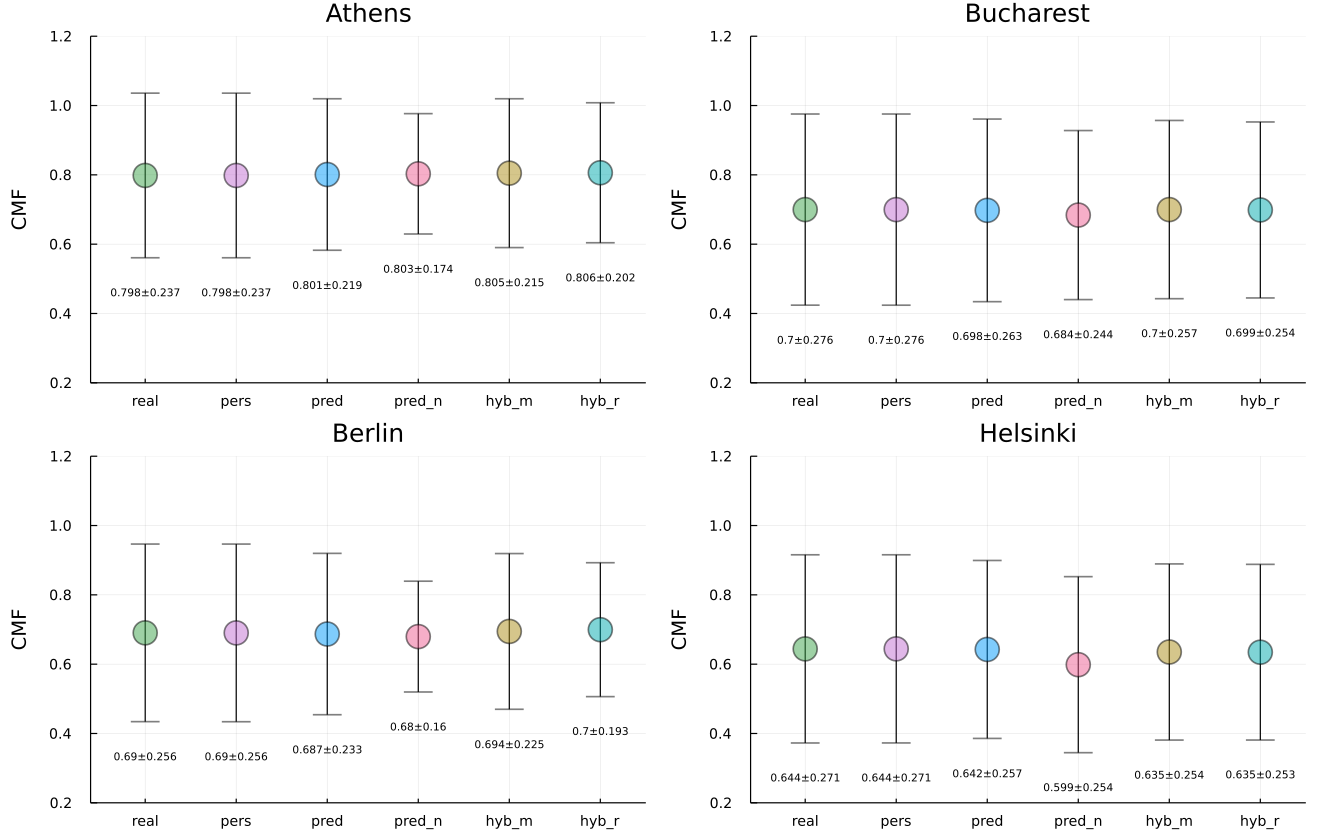

In [16]:
s_bu = viz_mn_sd_city(fn_bucharest, 4)
s_be = viz_mn_sd_city(fn_berlin, 4)
s_he = viz_mn_sd_city(fn_helsinki, 4)

sca = plot(s_at, s_bu, s_be, s_he, layout=@layout([a b; c d]), size=(1100, 700), leftmargin=20px)

#### bias range

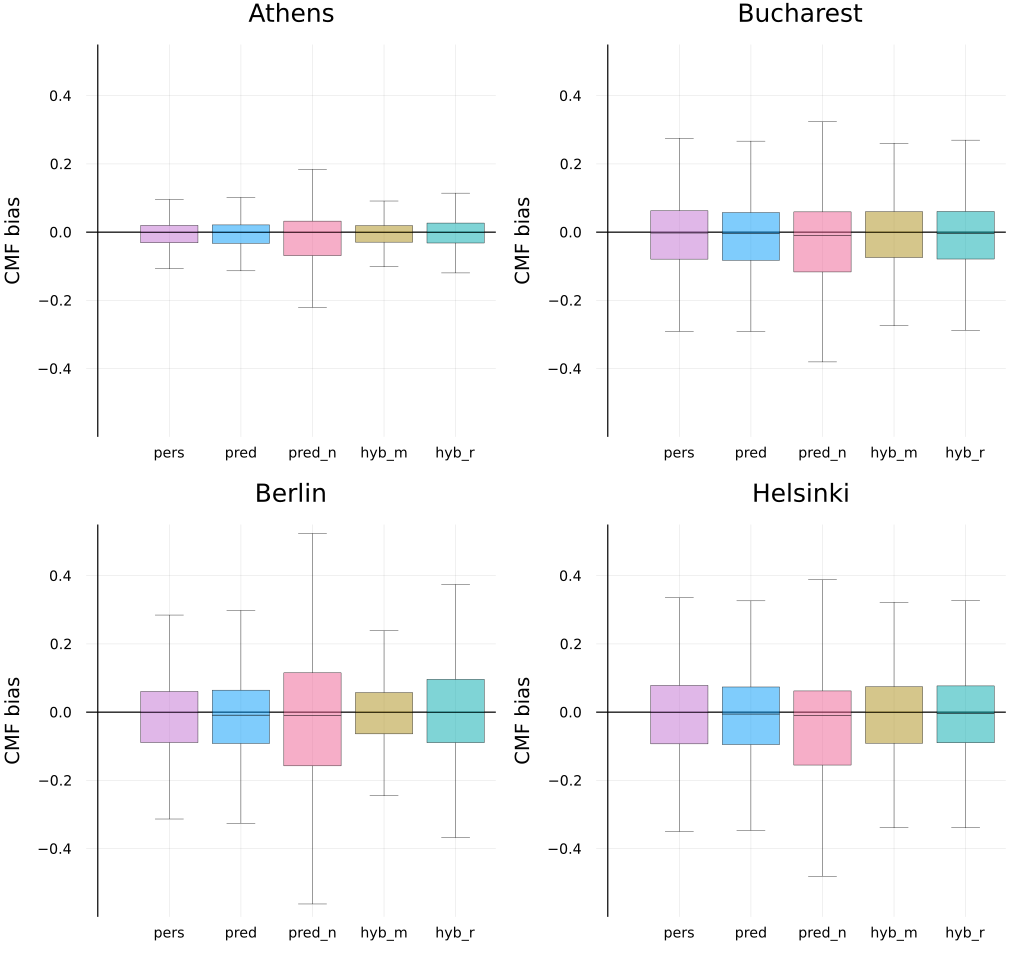

In [24]:
bxs = plot(bx_at, bx_bu, bx_be, bx_he, layout=@layout([a b; c d]), ylim=(-0.6,0.55), size=(850,800))